<a href="https://colab.research.google.com/github/Ghansu19/UpgradG/blob/main/Bike_Sharing_Assignment_Case_Study_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [93]:
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')

In [94]:
# Importing Data set

url= 'https://raw.githubusercontent.com/Ghansu19/UpgradG/main/day.csv'
bike_sharing = pd.read_csv(url)

In [95]:
# Looking at the first five rows
bike_sharing.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [96]:
#Reading data set

bike_sharing.shape



(730, 16)

In [97]:
bike_sharing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [98]:
bike_sharing.describe()



,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [99]:
#Data Visualization
# Dropping index column "instant" will not be useful in building the model.
bike_sharing.drop(["instant"], axis=1 , inplace=True)


In [100]:
bike_sharing.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [101]:
# Dropping "dteday" column as we have columns with similar information.
bike_sharing.drop(["dteday"], axis=1 , inplace=True)

In [102]:
bike_sharing.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [103]:
## Convert Season,Weathersit and Weekday columns to categorical types
# Season
bike_sharing.season=bike_sharing.season.map({1:"spring",2:"summer",3:"fall",4:"winter"})


In [104]:
bike_sharing.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,spring,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,spring,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,spring,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,spring,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,spring,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [105]:
#weekday
bike_sharing.weekday=bike_sharing.weekday.map({0:"sun",1:"mon",2:"tue",3:"wed",4:"thu",5:"fri",6:"sat"})

In [106]:
bike_sharing.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,spring,0,1,0,mon,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,spring,0,1,0,tue,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,spring,0,1,0,wed,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,spring,0,1,0,thu,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,spring,0,1,0,fri,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [107]:
#Weathersit
bike_sharing.weathersit=bike_sharing.weathersit.map({1:"clear_partly clouds",2:"mist_cloudy",3:"light snow_light rain_thunderstorm",4:"heavy rain_fog"})

In [108]:
bike_sharing.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,spring,0,1,0,mon,1,mist_cloudy,14.110847,18.18125,80.5833,10.749882,331,654,985
1,spring,0,1,0,tue,1,mist_cloudy,14.902598,17.68695,69.6087,16.652113,131,670,801
2,spring,0,1,0,wed,1,clear_partly clouds,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,spring,0,1,0,thu,1,clear_partly clouds,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,spring,0,1,0,fri,1,clear_partly clouds,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [109]:
# mnth
bike_sharing.mnth = bike_sharing.mnth.map({1:'jan',2:'feb',3:'mar',4:'apr',5:'may',6:'june',7:'july',8:'aug',9:'sep',10:'oct',11:'nov',12:'dec'})

In [110]:
bike_sharing.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,spring,0,jan,0,mon,1,mist_cloudy,14.110847,18.18125,80.5833,10.749882,331,654,985
1,spring,0,jan,0,tue,1,mist_cloudy,14.902598,17.68695,69.6087,16.652113,131,670,801
2,spring,0,jan,0,wed,1,clear_partly clouds,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,spring,0,jan,0,thu,1,clear_partly clouds,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,spring,0,jan,0,fri,1,clear_partly clouds,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [111]:
bike_sharing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    object 
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  casual      730 non-null    int64  
 12  registered  730 non-null    int64  
 13  cnt         730 non-null    int64  
dtypes: float64(4), int64(6), object(4)
memory usage: 80.0+ KB


In [112]:
## DATA Visualization 
#importing libraries for visualization of data
import matplotlib.pyplot as plt
import seaborn as sns

In [113]:
# Segregation of columns to categorical and numerical type
cat_column = ["season","yr","mnth","holiday","weekday","workingday","weathersit"]
num_column = ["temp","atemp","hum","windspeed"]

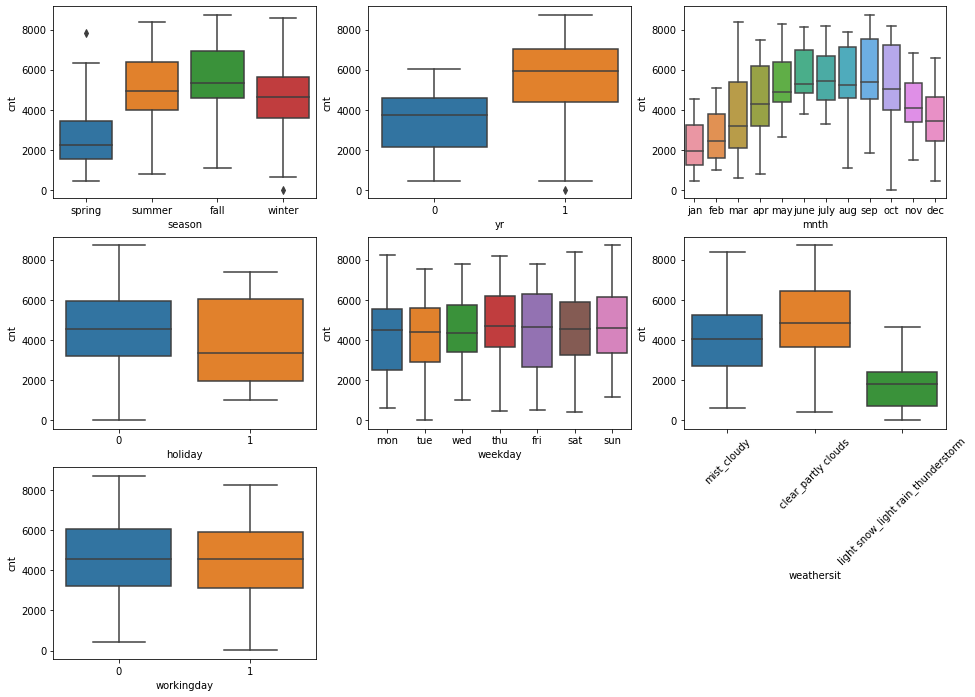

In [114]:
## Analyzing Categorical Variables with Boxplot

plt.figure(figsize=(16,12))
plt.subplot(3,3,1)
sns.boxplot(x ="season", y = "cnt", data = bike_sharing)
plt.subplot(3,3,2)
sns.boxplot(x = "yr", y = "cnt", data = bike_sharing)
plt.subplot(3,3,3)
sns.boxplot(x = "mnth", y = "cnt", data = bike_sharing)
plt.subplot(3,3,4)
sns.boxplot(x = "holiday", y = "cnt", data = bike_sharing)
plt.subplot(3,3,5)
sns.boxplot(x = "weekday", y = "cnt", data =bike_sharing)
plt.subplot(3,3,6)
sns.boxplot(x = "weathersit", y = "cnt", data = bike_sharing)
plt.xticks(rotation='45')
plt.subplot(3,3,7)
sns.boxplot(x = "workingday", y ="cnt", data = bike_sharing)
plt.show()

In [115]:
#Findings
# Rental count is high in summer and fall season.
# Rental count is more in 2019 as compared to 2018.
# Rental count is more in month june to october.

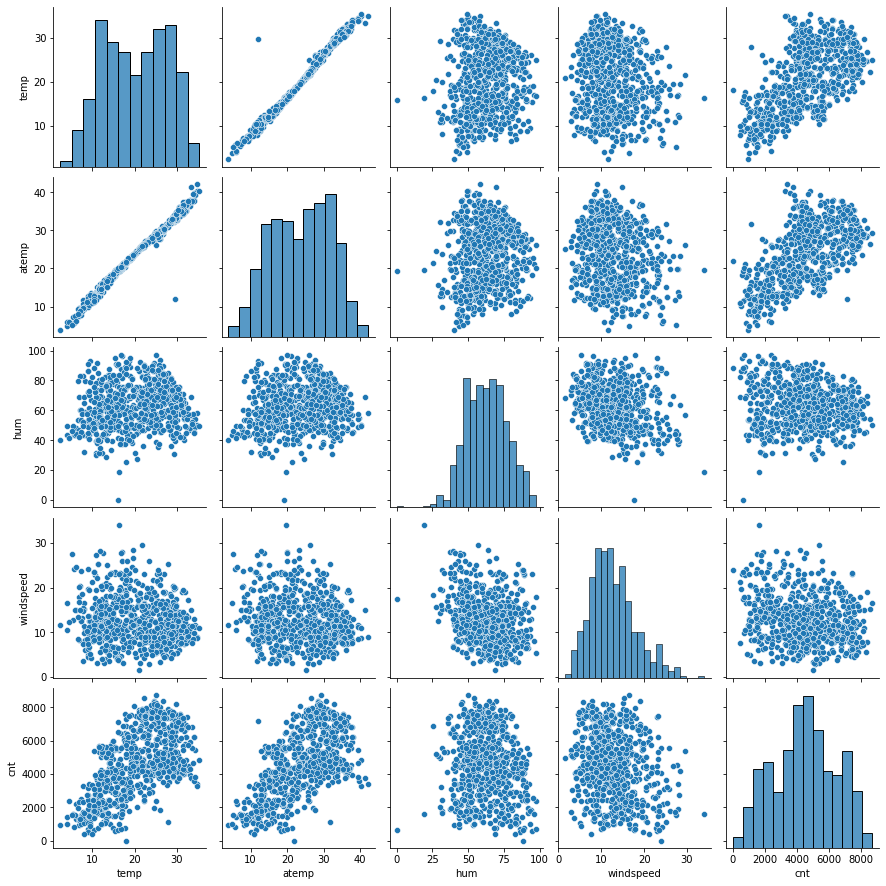

In [116]:
# Analyzing Numerical Variables
sns.pairplot(bike_sharing , vars=["temp","atemp","hum","windspeed","cnt"])
plt.show()

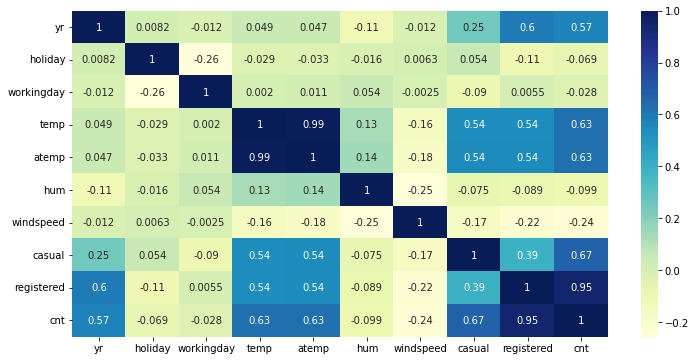

In [117]:
#plotiing through heatmap for checking corelation
plt.figure(figsize = (12, 6))
sns.heatmap(bike_sharing.corr(), annot = True, cmap="YlGnBu") 
plt.show()

In [118]:
#Findings

# The coorelation between temp and atemp is very high 0.99.
# The coreation between cnt with yr and temp also looks good.

In [119]:
#Data Preparation

# Creating Dummy varaibles
seasons_1 = pd.get_dummies(bike_sharing.season,drop_first=True)
months_1 = pd.get_dummies(bike_sharing.mnth,drop_first=True)
weekdays_1 = pd.get_dummies(bike_sharing.weekday,drop_first=True)
weathersit_1 = pd.get_dummies(bike_sharing.weathersit,drop_first=True)

In [120]:
seasons_1.head()

,spring,summer,winter
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0


In [121]:
months_1.head()

,aug,dec,feb,jan,july,june,mar,may,nov,oct,sep
0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,0


In [122]:
weathersit_1.head()

,light snow_light rain_thunderstorm,mist_cloudy
0,0,1
1,0,1
2,0,0
3,0,0
4,0,0


In [123]:
## concating all the dataframe to the bike_sharing dataset
bike_sharing = pd.concat([bike_sharing,seasons_1,months_1,weekdays_1,weathersit_1],axis=1)

In [124]:
bike_sharing.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,...,oct,sep,mon,sat,sun,thu,tue,wed,light snow_light rain_thunderstorm,mist_cloudy
0,spring,0,jan,0,mon,1,mist_cloudy,14.110847,18.18125,80.5833,...,0,0,1,0,0,0,0,0,0,1
1,spring,0,jan,0,tue,1,mist_cloudy,14.902598,17.68695,69.6087,...,0,0,0,0,0,0,1,0,0,1
2,spring,0,jan,0,wed,1,clear_partly clouds,8.050924,9.47025,43.7273,...,0,0,0,0,0,0,0,1,0,0
3,spring,0,jan,0,thu,1,clear_partly clouds,8.200000,10.60610,59.0435,...,0,0,0,0,0,1,0,0,0,0
4,spring,0,jan,0,fri,1,clear_partly clouds,9.305237,11.46350,43.6957,...,0,0,0,0,0,0,0,0,0,0


In [125]:
# Dropping season, mnth, weekday, weathersit columns. As we will be using dummy binary columns for models
bike_sharing.drop(["season","mnth","weekday","weathersit"], axis = 1, inplace = True)

In [126]:
bike_sharing.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,casual,registered,cnt,...,oct,sep,mon,sat,sun,thu,tue,wed,light snow_light rain_thunderstorm,mist_cloudy
0,0,0,1,14.110847,18.18125,80.5833,10.749882,331,654,985,...,0,0,1,0,0,0,0,0,0,1
1,0,0,1,14.902598,17.68695,69.6087,16.652113,131,670,801,...,0,0,0,0,0,0,1,0,0,1
2,0,0,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349,...,0,0,0,0,0,0,0,1,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562,...,0,0,0,0,0,1,0,0,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600,...,0,0,0,0,0,0,0,0,0,0


In [127]:
#Splitting the Data into Training and Test

# Splitting the Data: 70/30

from sklearn.model_selection import train_test_split
np.random.seed(0)

df_train, df_test = train_test_split(bike_sharing, train_size = 0.7, test_size = 0.3, random_state = 100)

In [128]:

#Rescaling  the features-using MinMax scaling


from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [129]:
# Apply scaler() to all the columns except the yr, holiday, workingday and 'dummy' variables
num_vars = ['temp', 'atemp', 'hum', 'windspeed' ,'cnt']

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [130]:
df_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,casual,registered,cnt,...,oct,sep,mon,sat,sun,thu,tue,wed,light snow_light rain_thunderstorm,mist_cloudy
653,1,0,1,0.509887,0.501133,0.575354,0.300794,922,6612,0.864243,...,1,0,0,0,0,0,0,1,0,0
576,1,0,1,0.815169,0.766351,0.725633,0.264686,968,6248,0.827658,...,0,0,0,0,0,0,0,1,0,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,956,3110,0.465255,...,0,0,0,0,1,0,0,0,0,1
728,1,0,1,0.245101,0.200348,0.498067,0.663106,364,1432,0.204096,...,0,0,1,0,0,0,0,0,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,1120,3100,0.482973,...,0,0,0,0,1,0,0,0,0,1


In [131]:
df_train.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,casual,registered,cnt,...,oct,sep,mon,sat,sun,thu,tue,wed,light snow_light rain_thunderstorm,mist_cloudy
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.711765,0.537262,0.512989,0.650369,0.320768,837.543137,3648.839216,0.513620,...,0.086275,0.080392,0.154902,0.129412,0.137255,0.143137,0.152941,0.135294,0.029412,0.343137
std,0.500429,0.157763,0.453386,0.225844,0.212385,0.145882,0.169797,675.921998,1580.336986,0.224593,...,0.281045,0.272166,0.362166,0.335985,0.344454,0.350557,0.360284,0.342373,0.169124,0.475223
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,20.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.332086,0.538643,0.199179,311.000000,2468.250000,0.356420,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.540519,0.526811,0.653714,0.296763,700.000000,3657.000000,0.518638,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.688457,0.754830,0.414447,1076.250000,4841.000000,0.684710,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3283.000000,6946.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [132]:
# creating the X and y variable
y_train = df_train.pop("cnt")
X_train = df_train

In [133]:
X_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,casual,registered,spring,...,oct,sep,mon,sat,sun,thu,tue,wed,light snow_light rain_thunderstorm,mist_cloudy
653,1,0,1,0.509887,0.501133,0.575354,0.300794,922,6612,0,...,1,0,0,0,0,0,0,1,0,0
576,1,0,1,0.815169,0.766351,0.725633,0.264686,968,6248,0,...,0,0,0,0,0,0,0,1,0,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,956,3110,1,...,0,0,0,0,1,0,0,0,0,1
728,1,0,1,0.245101,0.200348,0.498067,0.663106,364,1432,1,...,0,0,1,0,0,0,0,0,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,1120,3100,0,...,0,0,0,0,1,0,0,0,0,1


In [134]:
y_train.head()

653    0.864243
576    0.827658
426    0.465255
728    0.204096
482    0.482973
Name: cnt, dtype: float64

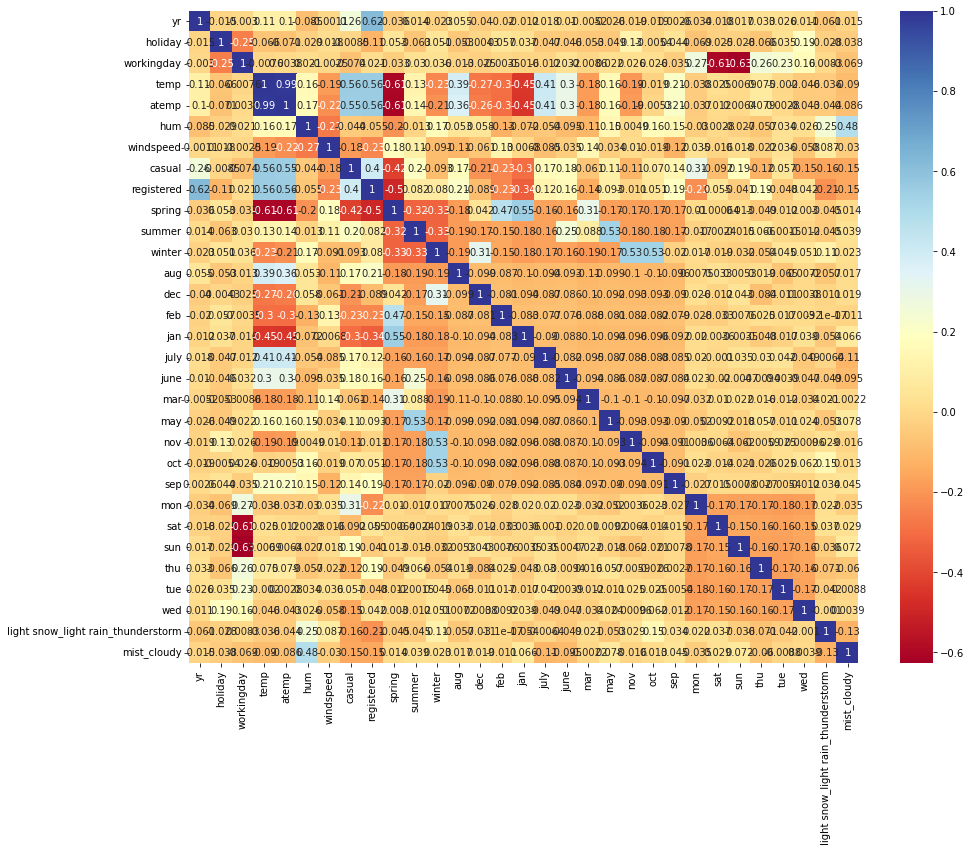

In [135]:
# Heat map to check correlation coefficients

plt.figure(figsize = (15,12))
sns.heatmap(df_train.corr(), annot = True, cmap="RdYlBu")
plt.show()

In [136]:
# Building our model
# This time, we will be using the LinearRegression function from SciKit Learn for its compatibility with RFE (which is a utility from sklearn)

In [137]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [138]:
# Running RFE with the output number of the variable equal to 15
lm = LinearRegression()
lm.fit(X_train, y_train)


LinearRegression()

In [139]:
# running RFE
rfe = RFE(lm, step=15)
rfe = rfe.fit(X_train, y_train)

In [140]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('casual', True, 1),
 ('registered', True, 1),
 ('spring', True, 1),
 ('summer', True, 1),
 ('winter', False, 3),
 ('aug', False, 3),
 ('dec', False, 3),
 ('feb', False, 3),
 ('jan', True, 1),
 ('july', False, 3),
 ('june', False, 3),
 ('mar', False, 3),
 ('may', False, 3),
 ('nov', False, 3),
 ('oct', False, 3),
 ('sep', True, 1),
 ('mon', False, 3),
 ('sat', True, 1),
 ('sun', False, 3),
 ('thu', False, 3),
 ('tue', False, 3),
 ('wed', True, 1),
 ('light snow_light rain_thunderstorm', False, 2),
 ('mist_cloudy', False, 3)]

In [141]:
# selecting the RFE columns
column = X_train.columns[rfe.support_]
column

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'spring', 'summer', 'jan', 'sep', 'sat', 'wed'],
      dtype='object')

In [142]:
X_train.columns[~rfe.support_]

Index(['winter', 'aug', 'dec', 'feb', 'july', 'june', 'mar', 'may', 'nov',
       'oct', 'mon', 'sun', 'thu', 'tue', 'light snow_light rain_thunderstorm',
       'mist_cloudy'],
      dtype='object')

In [143]:
## Building model using statsmodel, for the detailed statistics

# Building the 1st Model
X_train_rfe = X_train[column]

In [144]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm_1 = sm.add_constant(X_train_rfe)

In [145]:
# Running the linear model
lm_1 = sm.OLS(y_train,X_train_lm_1).fit() 

In [146]:
#Let's see the summary of our linear model
print(lm_1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.046e+31
Date:                Tue, 17 Jan 2023   Prob (F-statistic):               0.00
Time:                        13:42:44   Log-Likelihood:                 17361.
No. Observations:                 510   AIC:                        -3.469e+04
Df Residuals:                     494   BIC:                        -3.462e+04
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0025    1.6e-16  -1.59e+13      0.0

In [147]:
# Calculate VIF

from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,atemp,356.92
3,temp,342.11
8,registered,18.75
5,hum,12.21
2,workingday,6.05
0,yr,4.45
6,windspeed,4.44
7,casual,4.43
9,spring,2.55
13,sat,1.98


In [148]:
# Dropping atemp since showing very high VIF values (considering VIF less than 5 good VIF Value criteria)
X_train_new = X_train_rfe.drop(["atemp"], axis = 1)

In [149]:
# Building the 2nd Model

X_train_lm_2 = sm.add_constant(X_train_new)
lm_2 = sm.OLS(y_train,X_train_lm_2).fit()
print(lm_2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 5.119e+31
Date:                Tue, 17 Jan 2023   Prob (F-statistic):               0.00
Time:                        13:46:34   Log-Likelihood:                 17748.
No. Observations:                 510   AIC:                        -3.547e+04
Df Residuals:                     495   BIC:                        -3.540e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0025   7.46e-17   -3.4e+13      0.0

In [150]:
# Calculate the VIFs for the 2nd model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
7,registered,18.44
3,temp,16.61
4,hum,11.82
2,workingday,6.05
6,casual,4.42
0,yr,4.41
5,windspeed,4.31
8,spring,2.54
12,sat,1.98
9,summer,1.65


In [151]:
# As registered shows  high VIF values hence we can drop it
X_train_new = X_train_new.drop(['registered'], axis = 1)

In [152]:
#Building the 3rd Model
X_train_lm_3 = sm.add_constant(X_train_new)
lm_3 = sm.OLS(y_train,X_train_lm_3).fit()
print(lm_3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     192.3
Date:                Tue, 17 Jan 2023   Prob (F-statistic):          4.25e-184
Time:                        13:48:37   Log-Likelihood:                 497.07
No. Observations:                 510   AIC:                            -966.1
Df Residuals:                     496   BIC:                            -906.9
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.4157      0.031     13.297      0.0

In [153]:
# Calculate the VIFs for the 3rd model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,temp,12.30
4,hum,11.66
2,workingday,5.72
6,casual,4.42
5,windspeed,4.31
7,spring,2.49
0,yr,2.20
11,sat,1.86
8,summer,1.65
9,jan,1.64


In [154]:
# As temp shows  high VIF values hence we can drop it
X_train_new = X_train_new.drop(['temp'], axis = 1)

In [156]:
# Building the 4th Model

X_train_lm_4 = sm.add_constant(X_train_new)
lm_4 = sm.OLS(y_train,X_train_lm_4).fit()
print(lm_4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.800
Model:                            OLS   Adj. R-squared:                  0.795
Method:                 Least Squares   F-statistic:                     165.6
Date:                Tue, 17 Jan 2023   Prob (F-statistic):          5.99e-165
Time:                        13:52:39   Log-Likelihood:                 448.84
No. Observations:                 510   AIC:                            -871.7
Df Residuals:                     497   BIC:                            -816.6
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5193      0.032     16.007      0.0

In [157]:
# Calculate the VIFs for the 4th model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,8.57
2,workingday,5.48
4,windspeed,4.19
5,casual,3.14
6,spring,2.31
0,yr,2.20
10,sat,1.76
7,summer,1.64
8,jan,1.61
11,wed,1.31


In [158]:
# As hum shows  high P values hence we can drop it
X_train_new = X_train_new.drop(['hum'], axis = 1)

In [159]:
## Building the 5th Model

X_train_lm_5 = sm.add_constant(X_train_new)
lm_5 = sm.OLS(y_train,X_train_lm_5).fit()
print(lm_5.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.785
Model:                            OLS   Adj. R-squared:                  0.781
Method:                 Least Squares   F-statistic:                     165.6
Date:                Tue, 17 Jan 2023   Prob (F-statistic):          1.83e-158
Time:                        13:55:09   Log-Likelihood:                 430.78
No. Observations:                 510   AIC:                            -837.6
Df Residuals:                     498   BIC:                            -786.7
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3616      0.020     18.142      0.0

In [160]:
# Calculate the VIFs for the 5th model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,windspeed,3.86
2,workingday,3.66
4,casual,2.73
5,spring,2.29
0,yr,2.20
6,summer,1.63
7,jan,1.60
9,sat,1.39
10,wed,1.29
1,holiday,1.18


In [161]:
# As workingday shows  high P values hence we can drop it
X_train_new = X_train_new.drop(['workingday'], axis = 1)

In [162]:
# Building the 6th Model

X_train_lm_6 = sm.add_constant(X_train_new)
lm_6 = sm.OLS(y_train,X_train_lm_6).fit()
print(lm_6.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.784
Model:                            OLS   Adj. R-squared:                  0.780
Method:                 Least Squares   F-statistic:                     181.6
Date:                Tue, 17 Jan 2023   Prob (F-statistic):          3.40e-159
Time:                        13:58:41   Log-Likelihood:                 429.81
No. Observations:                 510   AIC:                            -837.6
Df Residuals:                     499   BIC:                            -791.0
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3800      0.015     25.586      0.0

In [163]:
# Calculate the VIFs for the 6th model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,windspeed,3.00
3,casual,2.52
4,spring,2.26
0,yr,2.16
5,summer,1.62
6,jan,1.59
9,wed,1.19
7,sep,1.17
8,sat,1.13
1,holiday,1.08


In [ ]:
# We can cosider the model lm_6, as it is having very low multicolinearity between the predictors 
# and the p-values for all the predictors is significant. 
# F-Statistics value of 181.6 (which is greater than 1) 
# and the Prob (F-statistic) of 3.40e-159 i.e almost equals to zero, states that the overall model is significant

In [ ]:
# Residual Analysis of the train data

#So, now to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.

In [164]:
# calculating the prediction value of y for the lm_6 model
y_train_pred = lm_6.predict(X_train_lm_6)

Text(0.5, 0, 'Errors')

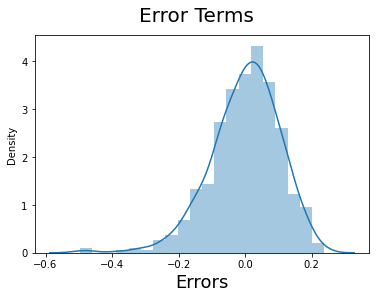

In [166]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

Above graph clearly state that Errors are normally

Multicolinearity of Model

In [167]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,windspeed,3.00
3,casual,2.52
4,spring,2.26
0,yr,2.16
5,summer,1.62
6,jan,1.59
9,wed,1.19
7,sep,1.17
8,sat,1.13
1,holiday,1.08


All the values of VIF are less than 5. So the model is having no multicolinearity.

**Linearity of Model**

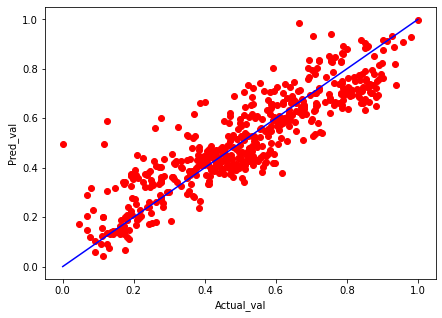

In [168]:
plt.figure(figsize=(7,5))
plt.scatter(y_train, y_train_pred, c="red")
plt.xlabel("Actual_val")
plt.ylabel("Pred_val")
p1 = max(max(y_train_pred), max(y_train))
p2 = min(min(y_train_pred), min(y_train))
plt.plot([p1, p2], [p1, p2], 'b-')

# Making Predictions
# Applying the scaling on the test sets

In [169]:
num_vars = ["temp","atemp", "hum", "windspeed" ,"cnt"]

df_test[num_vars] = scaler.fit_transform(df_test[num_vars])


In [170]:
df_test.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,casual,registered,cnt,...,oct,sep,mon,sat,sun,thu,tue,wed,light snow_light rain_thunderstorm,mist_cloudy
184,0,1,0,0.837241,0.778767,0.534223,0.149393,3065,2978,0.704300,...,0,0,0,0,0,0,0,1,0,1
535,1,0,1,0.911423,0.855132,0.470417,0.231142,872,5339,0.725421,...,0,0,0,0,0,1,0,0,0,0
299,0,0,0,0.496221,0.492359,0.777843,0.443398,240,2419,0.278853,...,1,0,0,1,0,0,0,0,0,1
221,0,0,1,0.890387,0.805661,0.236659,0.449707,884,3896,0.545512,...,0,0,0,0,0,0,0,0,0,0
152,0,0,0,0.821739,0.749249,0.070765,0.682387,736,4232,0.569148,...,0,0,0,1,0,0,0,0,0,0


In [171]:
df_test.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,casual,registered,cnt,...,oct,sep,mon,sat,sun,thu,tue,wed,light snow_light rain_thunderstorm,mist_cloudy
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,...,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.479452,0.036530,0.639269,0.546312,0.530942,0.508750,0.418870,875.968037,3671.013699,0.516216,...,0.082192,0.086758,0.118721,0.173516,0.155251,0.141553,0.123288,0.155251,0.027397,0.319635
std,0.500722,0.188034,0.481313,0.249189,0.228159,0.201253,0.188111,712.783588,1509.322560,0.238702,...,0.275286,0.282125,0.324202,0.379560,0.362974,0.349389,0.329520,0.362974,0.163612,0.467403
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,432.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.328479,0.333829,0.358469,0.283817,336.500000,2507.500000,0.359882,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.546045,0.547913,0.494200,0.402533,736.000000,3667.000000,0.520241,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.759735,0.720622,0.651165,0.524362,1190.000000,4624.000000,0.682487,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3410.000000,6844.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Dividing into X_test and y_test

In [172]:
# creating the X and y variable
y_test = df_test.pop("cnt")
X_test = df_test

In [173]:
# Now let's use our model to make predictions.

# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X_train_new.columns]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

In [174]:
# Making predictions
y_pred = lm_6.predict(X_test_new)

In [176]:
# checking the r2 score
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred) 
r2

0.7631536141769831

Model Evaluation

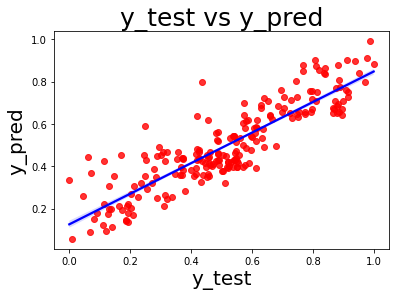

In [177]:
# Plotting y_test and y_pred to understand the spread.
plt.figure()
sns.regplot(x=y_test, y=y_pred, ci=68, fit_reg=True,scatter_kws={"color": "red"}, line_kws={"color": "blue"})
plt.title('y_test vs y_pred', fontsize=25)
plt.xlabel('y_test', fontsize=20)
plt.ylabel('y_pred', fontsize=20)
plt.show()


As the graph between test data and predicted data is linear it means model is giving the accurate prediction.

In [178]:
lm_6.params

const        0.379978
yr           0.215125
holiday     -0.113059
windspeed   -0.144551
casual       0.000129
spring      -0.154479
summer      -0.020684
jan         -0.073518
sep          0.059434
sat          0.040397
wed          0.037695
dtype: float64

We can see that the equation of our best fitted line is:

**cnt=0.379978+0.215125×yr−0.113059×holiday−0.144551×windspeed+0.000129×casual -0.154479×spring−-0.020684×summer-0.073518xjan+0.059434xsep+0.040397xsat+0.037695xwed**


R-square comparision:

R-squared score of train dataset is 0.784
R-squared score of test dataset is 0.763

**Final Summary:**

1. The negative coefficients such as holiday, windspeed, spring, summer, jan indicate that an increase in these values will lead to an decrease in the value of cnt.
2. The positive coefficients like yr,casual, jan, sep, sat, wed indicate that an increase in these values will lead to an increase in the value of cnt.
3. Holidays has got negative impact on number of rides.

**Predictions:**
1. Company should focus on business expansion during month of September.